In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns

<h1 style='color:cadetblue';>I. LOAD, CLEANING AND EXPLORATION OF DATA</h4>
<hr style='color:cadetblue'>

In [610]:
dataset = pd.read_csv("../Projekty/Karty/BankChurners.csv")
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<ul> Variables: </ul>  
<li> CLIENTNUM - Client number. Unique identifier for the customer holding the account </li>
<li> Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0 </li>
<li> Customer_Age - Demographic variable - Customer's Age in Years </li>
<li> Gender - Demographic variable - M=Male, F=Female </li>
<li> Dependent_count - Demographic variable - Number of dependents </li>
<li> Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) </li>
<li> Marital_Status - Demographic variable - Married, Single, Divorced, Unknown </li>
<li> Income_Category - demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) </li>
<li> Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum) </li>
<li> Months_on_book - Period of relationship with bank </li>
<li> Total_Relationship_Count - total no. of products held by the customer </li>
<li> Months_Inactive_12_mon - No. of months inactive in the last 12 months </li>
<li> Contacts_Count_12_mon - No. of Contacts in the last 12 months </li>
<li> Credit_Limit - Credit Limit on the Credit Card  </li>
<li> Total_Revolving_Bal - Total Revolving Balance on the Credit Card   </li>
<li> Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)  </li>
<li> Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)  </li>
<li> Total_Trans_Amt - Total Transaction Amount (Last 12 months) </li>
<li> Total_Trans_Ct - Total Transaction Count (Last 12 months)  </li>
<li> Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)  </li>
<li> Avg_Utilization_Ratio - Average Card Utilization Ratio </li>


In [551]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [552]:
#removing two last columns
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [553]:
#checking null values
dataset.isna().sum() #no values are missing

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [554]:
#check duplicated values
dataset.duplicated().sum()

0

In [555]:
# Checking types of data
dataset.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [556]:
# Basic statistic
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


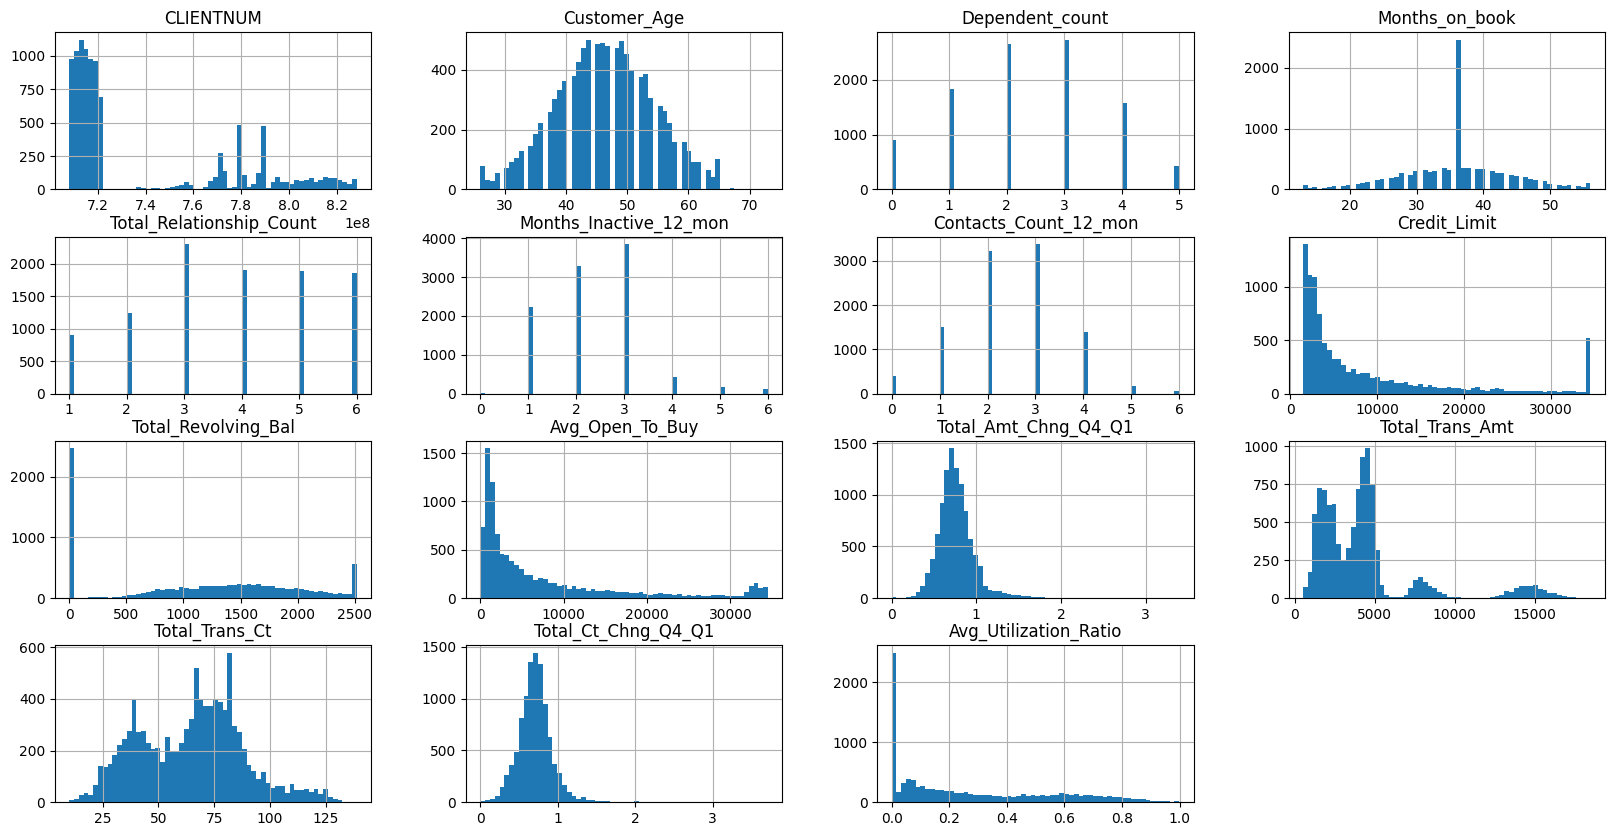

In [605]:
#Looking for strange data deviations
dataset.hist(bins=60, figsize=(20,10))
plt.show()

In [558]:
#checking names of categorical values (if it is always the same?)
pd.DataFrame(dataset['Marital_Status'].value_counts())

,Marital_Status
Married,4687
Single,3943
Unknown,749
Divorced,748


In [559]:
pd.DataFrame(dataset['Dependent_count'].value_counts())

,Dependent_count
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [560]:
pd.DataFrame(dataset['Attrition_Flag'].value_counts())

,Attrition_Flag
Existing Customer,8500
Attrited Customer,1627


In [561]:
pd.DataFrame(dataset['Education_Level'].value_counts())

,Education_Level
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [562]:
pd.DataFrame(dataset['Income_Category'].value_counts())

,Income_Category
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [563]:
pd.DataFrame(dataset['Gender'].value_counts())

,Gender
F,5358
M,4769


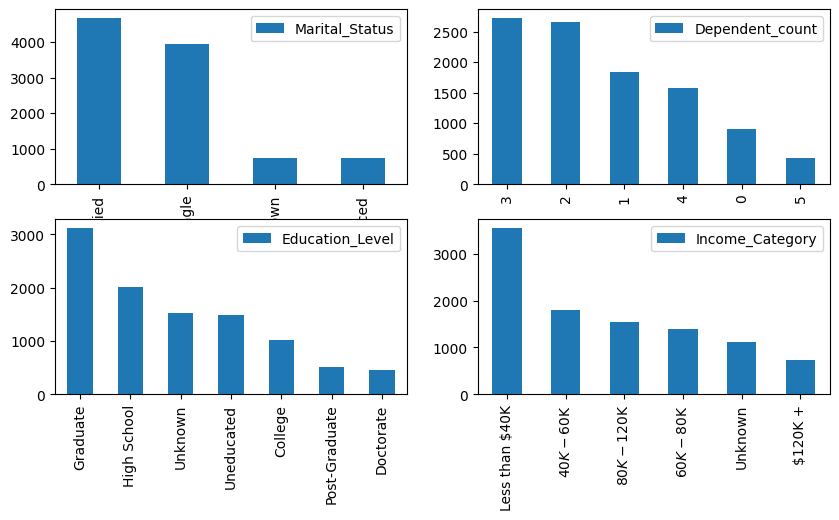

In [604]:
fig, ax = plt.subplots(2,2, figsize=(10,5))

pd.DataFrame(dataset['Marital_Status'].value_counts()).plot(kind='bar', ax=ax[0,0])
pd.DataFrame(dataset['Dependent_count'].value_counts()).plot(kind='bar', ax=ax[0,1])
pd.DataFrame(dataset['Education_Level'].value_counts()).plot(kind='bar', ax=ax[1,0])
pd.DataFrame(dataset['Income_Category'].value_counts()).plot(kind='bar', ax=ax[1,1])

plt.show()

It seems to be everything fine with dataset, we do not have outliers, null values and any strange situations. 

<br>

<h1 style='color:cadetblue';>II. EXPLOATORY ANALYSIS</h4>
<hr style='color:cadetblue'>

In [568]:
corr = dataset.corr()
corr.style.background_gradient(cmap='BrBG_r')

/var/folders/_8/fj4h73xd2k9bkvnpc48zttvh0000gn/T/ipykernel_6552/1410523410.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<br>Observed correlation between numerical values (from strongest): </br>
<ul>
   <li> Credit_Limit and Avg_Open_To_Buy (0.996) positive </li>
   <li> Total_Trans_Ct and Total_Trans_Amt (0.807) positive </li>
   <li> Months_on_book and Customer_Age (0.789) positive </li>
   <li> Avg_Utilization_Ratio and Total_Revolving_Bal (0.624) positive </li>
   <li> Avg_Utilization_Ratio and Avg_Open_To_Buy ( - 0.539) negative </li>
</ul>

<h4 style='color:cadetblue'> Differences between attrited and existing customers </h4>


In [569]:
#preparing subsets
attrited=dataset.query(" Attrition_Flag == 'Attrited Customer' ")
existing=dataset.query(" Attrition_Flag == 'Existing Customer' ")

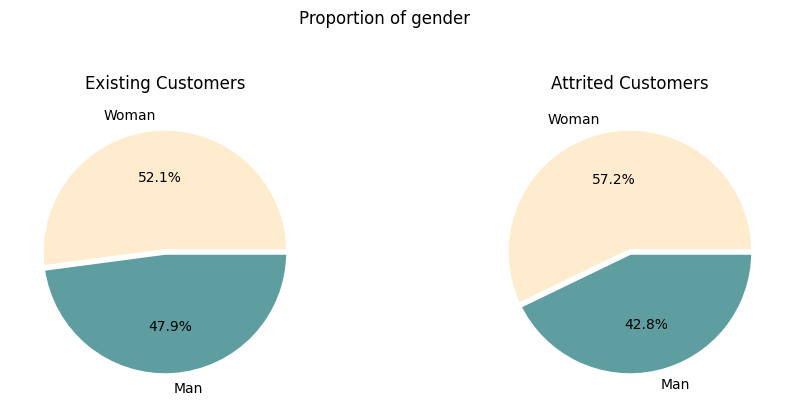

In [597]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

wedgeprops = {'linewidth': 4, 'edgecolor': 'white'}

existing_gender = existing['Gender'].value_counts()
axes[0].pie(existing_gender.values, labels=['Woman', 'Man'], autopct='%1.1f%%', colors=['blanchedalmond', 'cadetblue'], wedgeprops=wedgeprops)
axes[0].set_title('Existing Customers')

attrited_gender = attrited['Gender'].value_counts()
axes[1].pie(attrited_gender.values, labels=['Woman', 'Man'], autopct='%1.1f%%', colors=['blanchedalmond', 'cadetblue'], wedgeprops=wedgeprops)
axes[1].set_title('Attrited Customers')

fig.suptitle('Proportion of gender')

plt.subplots_adjust(wspace=0.5)
plt.show()

Overall, the proportion of female customers is higher in both groups, although the difference is slightly more pronounced for attrited customers.

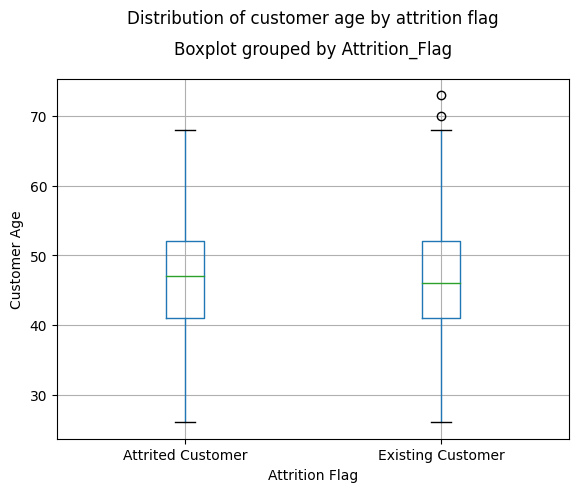

In [571]:
data = dataset[['Attrition_Flag', 'Customer_Age']]

# boxplots for each combination of customer attrition flag and customer age
data.boxplot(column='Customer_Age', by='Attrition_Flag')

plt.title('Distribution of customer age by attrition flag', pad=40)
plt.xlabel('Attrition Flag')
plt.ylabel('Customer Age')

plt.show()

We can see that the median age of attrited customers is slightly higher than that of existing customers. 
<br>


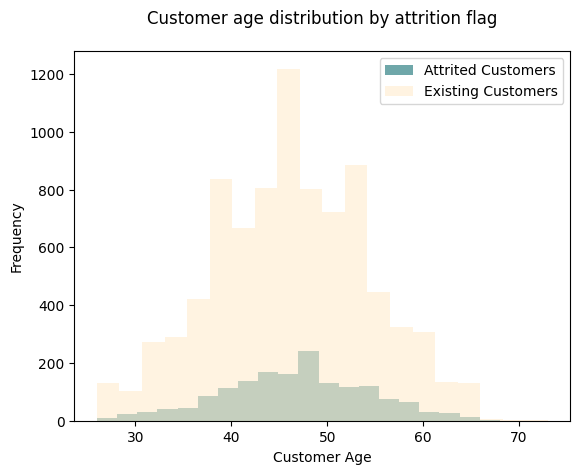

In [572]:
plt.hist(attrited['Customer_Age'], bins=20, alpha=0.9, color='cadetblue', label='Attrited Customers')
plt.hist(existing['Customer_Age'], bins=20, alpha=0.6, color='blanchedalmond', label='Existing Customers')

plt.title('Customer age distribution by attrition flag', pad=20)
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

plt.legend(loc='upper right')

plt.show()

We can see that the majority of both attrited and existing customers are between the ages of 40 and 55, but there are proportionately more existing customers in the younger age ranges (<30) than attrited customers. The graph also illustrates that the number of existing customers is higher across all age ranges than the number of attrited customers.
<br> <br>
Below we can see chart showing the existing and attrited customer age boxplots again, but with an additional breakdown by gender:

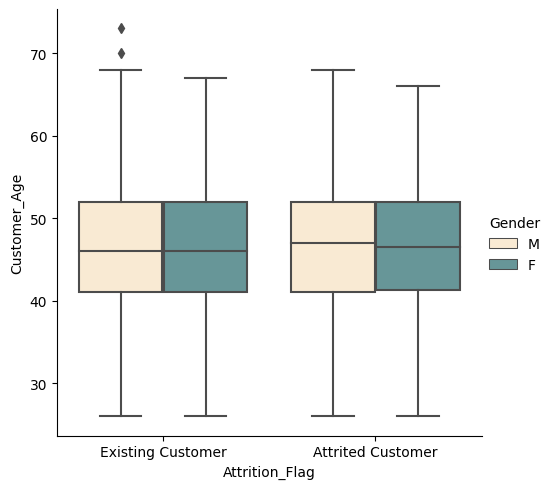

In [573]:
sns.catplot(x='Attrition_Flag', y='Customer_Age', hue='Gender', kind='box', data=dataset, palette=['blanchedalmond', 'cadetblue'])


In this specific chart, we can see that the age distribution for attrited customers for males is slightly higher than that the rest. Additionally, there is a wider range of ages (upwards) for males compared to females for both existing and attrited customers. 
For existing customers, the age distributions for males and females customers are similar, with more outliers for males.

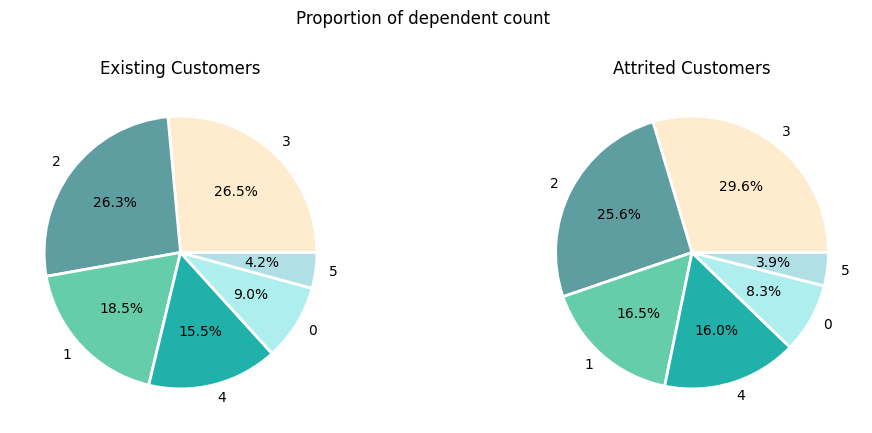

In [596]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

existing_gender = existing['Dependent_count'].value_counts()
axes[0].pie(existing_gender.values, labels=existing_gender.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'mediumaquamarine', 'lightseagreen', 'paleturquoise', 'powderblue'], wedgeprops=wedgeprops)
axes[0].set_title('Existing Customers')

attrited_gender = attrited['Dependent_count'].value_counts()
axes[1].pie(attrited_gender.values, labels=attrited_gender.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'mediumaquamarine', 'lightseagreen', 'paleturquoise', 'powderblue']
, wedgeprops=wedgeprops)
axes[1].set_title('Attrited Customers')

fig.suptitle('Proportion of dependent count')

plt.subplots_adjust(wspace=0.5)
plt.show()

The pie charts shows a similar pattern, with the majority of customers having 2 and 3 dependents (sum to >50%), followed by 1 and 4 dependent (sum to about 1/3 of chart). The remaining slices represent customers with 4, 0 and 5 dependents, which are much smaller proportions (sum to <15%).

Overall, the most significant difference in the proportion of dependent counts between existing and attrited customers is observed among customers having 3 dependents. There is a 3.1 percentage point higher proportion of attrited customers with 3 dependents than existing customers.

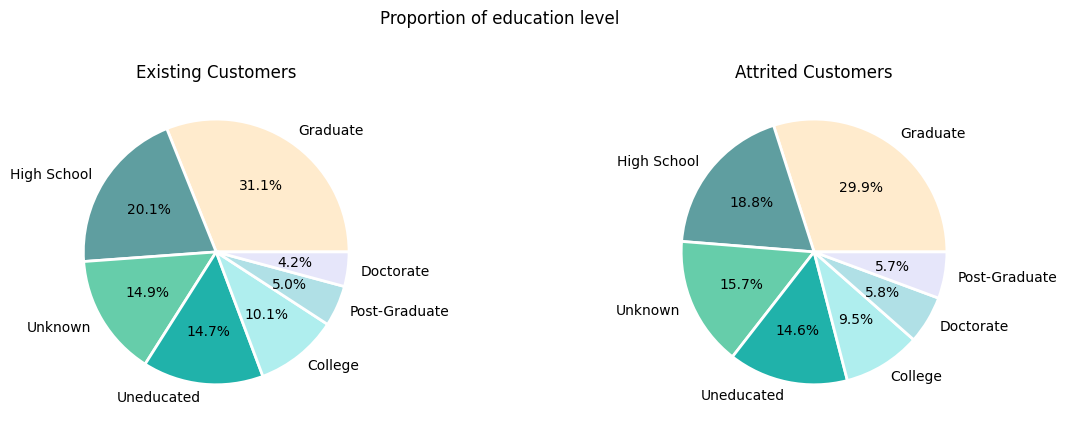

In [595]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

existing_education = existing['Education_Level'].value_counts()
axes[0].pie(existing_education.values, labels=existing_education.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'mediumaquamarine', 'lightseagreen', 'paleturquoise', 'powderblue', 'lavender'], wedgeprops=wedgeprops)
axes[0].set_title('Existing Customers')

attrited_education = attrited['Education_Level'].value_counts()
axes[1].pie(attrited_education.values, labels=attrited_education.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'mediumaquamarine', 'lightseagreen', 'paleturquoise', 'powderblue', 'lavender'], wedgeprops=wedgeprops)
axes[1].set_title('Attrited Customers')

fig.suptitle('Proportion of education level')

plt.subplots_adjust(wspace=0.8)
plt.show()

The chart shows a very similar pattern for both groups: the majority of customers, regardless of attrition flag, have a graduated degree, followed by high school degree. The only difference is that for existing customers, the least common education level is doctorate, followed by post-graduate, while for attrited customers it is the opposite situation. 

It is worth noting that a significant number of customers (around 15%) have an unknown level of education, regardless of the attrition flag. 

Based on the chart, we can observe that there is no clear correlation between education level and customer attrition. However, the high percentage of unknown education levels could also impact the analysis and lead to inaccurate conclusions. Without knowing the education level of a significant portion of customers, it is difficult to make definitive statements about the impact of education on customer attrition.

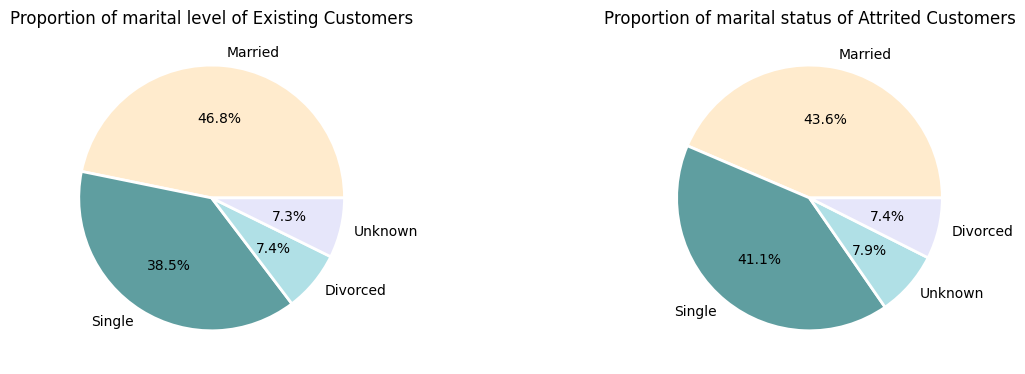

In [583]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

existing_marital = existing['Marital_Status'].value_counts()
axes[0].pie(existing_marital.values, labels=existing_marital.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'powderblue', 'lavender'], wedgeprops=wedgeprops)
axes[0].set_title('Proportion of marital level of Existing Customers')

attrited_marital = attrited['Marital_Status'].value_counts()
axes[1].pie(attrited_marital.values, labels=attrited_marital.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue', 'powderblue', 'lavender'], wedgeprops=wedgeprops)
axes[1].set_title('Proportion of marital status of Attrited Customers')

fig.suptitle('Proportion of marital status')

plt.subplots_adjust(wspace=0.8)
plt.show()

For both groups, the majority of customers are either married or single. However, there is a higher percentage of married customers in the existing group compared to the attrited group, while a higher percentage of single customers in the attrited group compared to the existing group. 
The percentage of divorced clients is similar for both groups, as is the percentage of clients with unknown marital status. 
However, single and divorced existing customer stands for 45.9% of chart and single and divorced attrited customer - 48.5%. This small but notable difference may indicate a correlation between marital status and customer attrition.

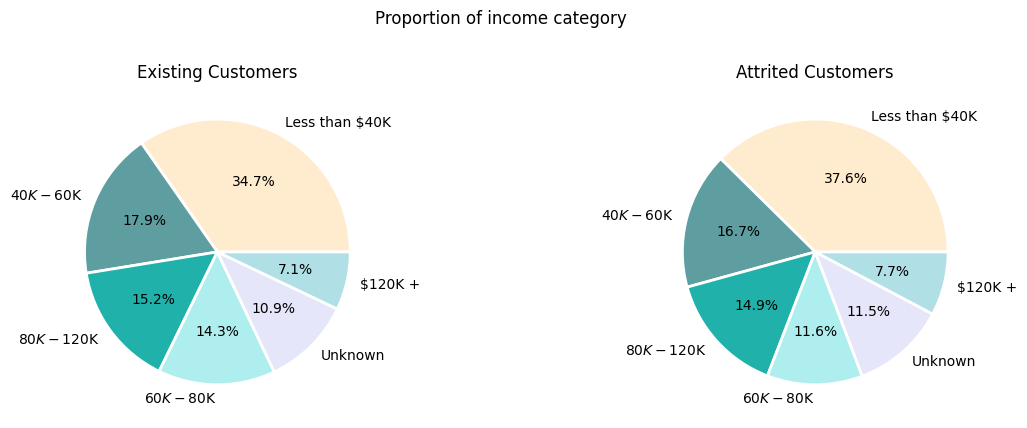

In [593]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

existing_income = existing['Income_Category'].value_counts()
axes[0].pie(existing_income.values, labels=existing_income.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue','lightseagreen','paleturquoise','lavender', 'powderblue'], wedgeprops=wedgeprops)
axes[0].set_title('Existing Customers')

attrited_income = attrited['Income_Category'].value_counts()
axes[1].pie(attrited_income.values, labels=attrited_income.index, autopct='%1.1f%%', colors=['blanchedalmond','cadetblue','lightseagreen','paleturquoise','lavender', 'powderblue'], wedgeprops=wedgeprops)
axes[1].set_title('Attrited Customers')

fig.suptitle('Proportion of income category')

plt.subplots_adjust(wspace=0.8)
plt.show()

The chart shows that for both groups, the largest proportion of customers fall into the "Less than $40K" and "$40K - $60K" income categories. However, there is a higher proportion of attrited customers in the extreme income categories ("Less than $40K" and "$120K +"), while the proportion of existing customers is higher in the middle income categories ('$40K - $60K', '$80K - $120K', '$60K - $80K'), especially in the '$60K - $80K' category.
This may indicate a correlation between extreme income categories and customer attrition.

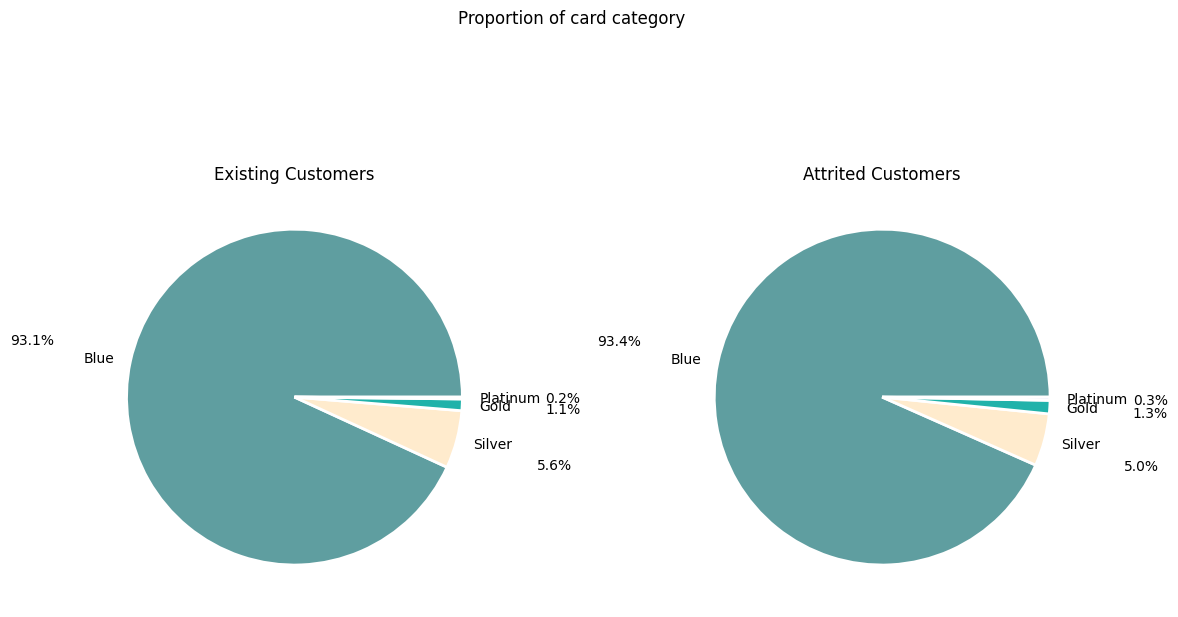

In [592]:
fig, axes = plt.subplots(1, 2, figsize=(13, 8))

wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

existing_card = existing['Card_Category'].value_counts()
axes[0].pie(existing_card.values, labels=existing_card.index, autopct='%1.1f%%', pctdistance=1.6, colors=['cadetblue','blanchedalmond','lightseagreen', 'lavender'], wedgeprops=wedgeprops)
axes[0].set_title('Existing Customers')

attrited_card = attrited['Card_Category'].value_counts()
axes[1].pie(attrited_card.values, labels=attrited_card.index, autopct='%1.1f%%', pctdistance=1.6,colors=['cadetblue','blanchedalmond','lightseagreen','lavender'], wedgeprops=wedgeprops)
axes[1].set_title('Attrited Customers')

fig.suptitle('Proportion of card category')

plt.subplots_adjust(wspace=0.4)
plt.show()

Both pie charts demonstrate that the most prevalent card category for customers in both groups is the Blue card, with less than 7% holding other card categories. 
The proportion of Platinum and Gold cardholders is sligthly higher among attrited customers than among existing ones. In contrast, the proportion of Silver cardholders is sligthly higher among existing customers than among attrited ones.

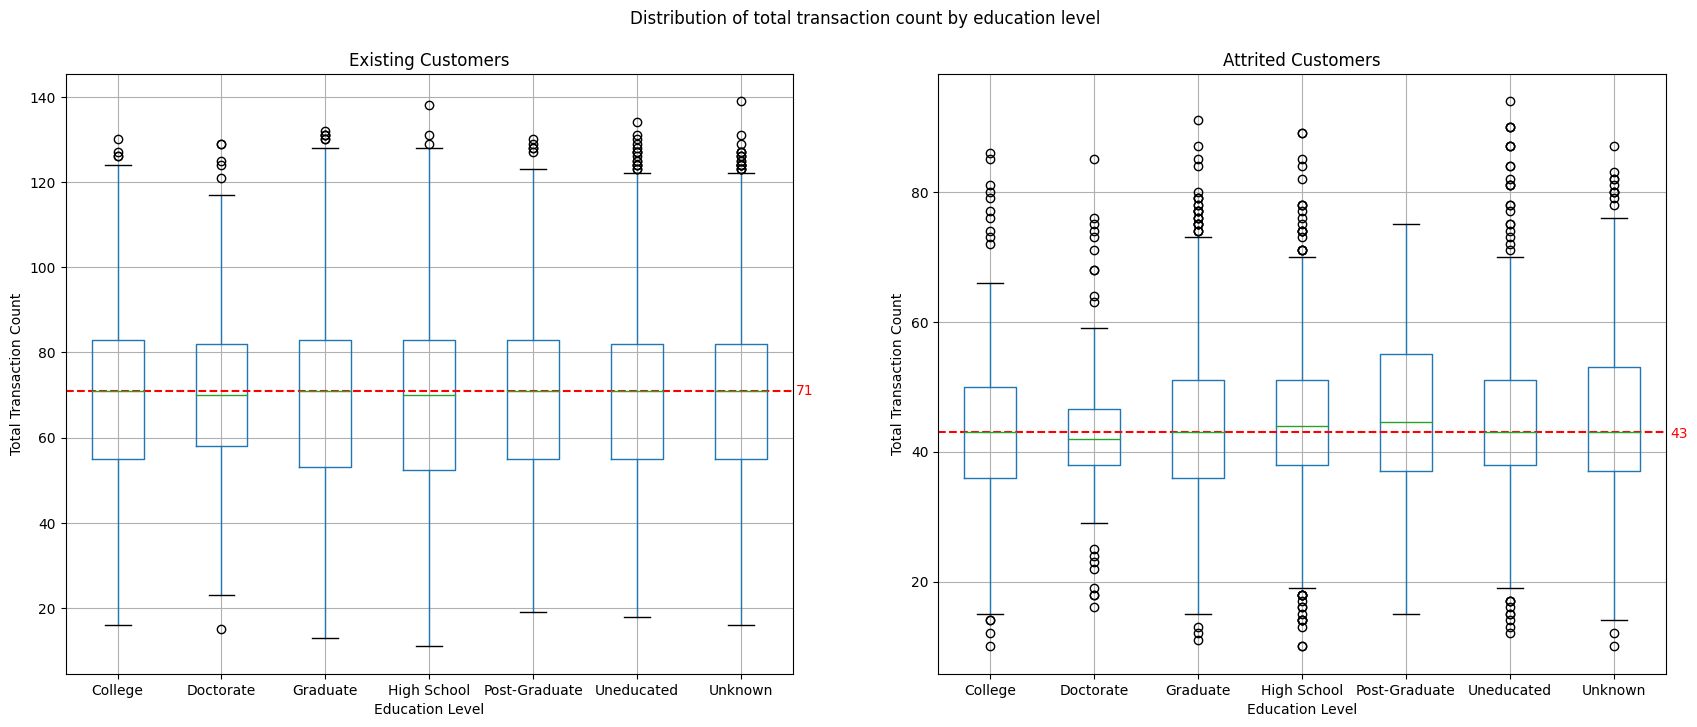

In [579]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

data_existing = existing[['Total_Trans_Ct', 'Education_Level']]
data_attrited = attrited[['Total_Trans_Ct', 'Education_Level']]

#coordinates for auxiliaries line (reference lines)
attrited_median =round(attrited['Total_Trans_Ct'].median()) 
existing_median= round(existing['Total_Trans_Ct'].median())

# plot boxplot for existing customers
data_existing.boxplot(column='Total_Trans_Ct', by='Education_Level', ax=ax1)
ax1.axhline(y=existing_median, color='r', linestyle='--') #reference line
ax1.annotate(existing_median, xy=(0.98, existing_median), xytext=(490, 0), textcoords='offset points', va='center', color='r') #reference line label
ax1.set_title('Existing Customers')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Total Transaction Count')

# plot boxplot for attrited customers
data_attrited.boxplot(column='Total_Trans_Ct', by='Education_Level', ax=ax2)
ax2.axhline(y=attrited_median, color='r', linestyle='--') #reference line
ax1.annotate(attrited_median, xy=(0.5, attrited_median), xytext=(1155, 55), textcoords='offset points', va='center', color='r') #reference line label
ax2.set_title('Attrited Customers')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Total Transaction Count')

fig.suptitle('Distribution of total transaction count by education level')

plt.show()

The chart consists of two side-by-side boxplots, one for existing customers and one for attrited customers. Each boxplot shows the distribution of the total transaction count by education level for each customer group.

On the left-hand side, we see the boxplot for existing customers. We can see that the boxes for each education level are relatively similar in size, indicating that the distribution of total transaction counts is fairly consistent across education levels. The median total transaction count for each education level ranges around 70. However, we can also see that there are some outliers, particularly for the Uneducated and Unknown education levels. In addition, the red dashed line at 71 represents a median for the total transaction count for existing customers. We can see that for most education levels, the median total transaction count is slightly above this threshold, indicating that the majority of existing customers make a high number of transactions.

On the right-hand side, we see the boxplot for attrited customers. Here, we see more variation in the box sizes, indicating that the distribution of total transaction counts varies more widely across education levels. The median total transaction count for each education level is generally lower than for existing customers, ranging from around 42 to 45. In addition, the red dashed line at 43 represents a median for the total transaction count for attrited customers. We can see that for some education levels, such as High School and Graduate, the median total transaction count is higher this threshold. Most of (College, Graduate, Uneducated, Unknown) are equal to threshold.

We can observe that customers with a doctorate degree had a lower number of transactions compared to the median value for both existing and attrited customers.

Based on this analysis, we can conclude that education level does not have a significant impact on the total transaction count for existing customers. However, for attrited customers, there seems to be a correlation between education level and total transaction count, with some education levels having a lower median transaction count than others. This suggests that education level may be a factor that contributes to customer attrition.

Furthermore, the observation that customers with a doctorate degree had a lower number of transactions compared to the median value for both existing and attrited customers is interesting. This could indicate that customers with higher levels of education may be more discerning and selective about the services they use or may have different priorities when it comes to banking. Further analysis could be done to investigate this relationship more deeply.




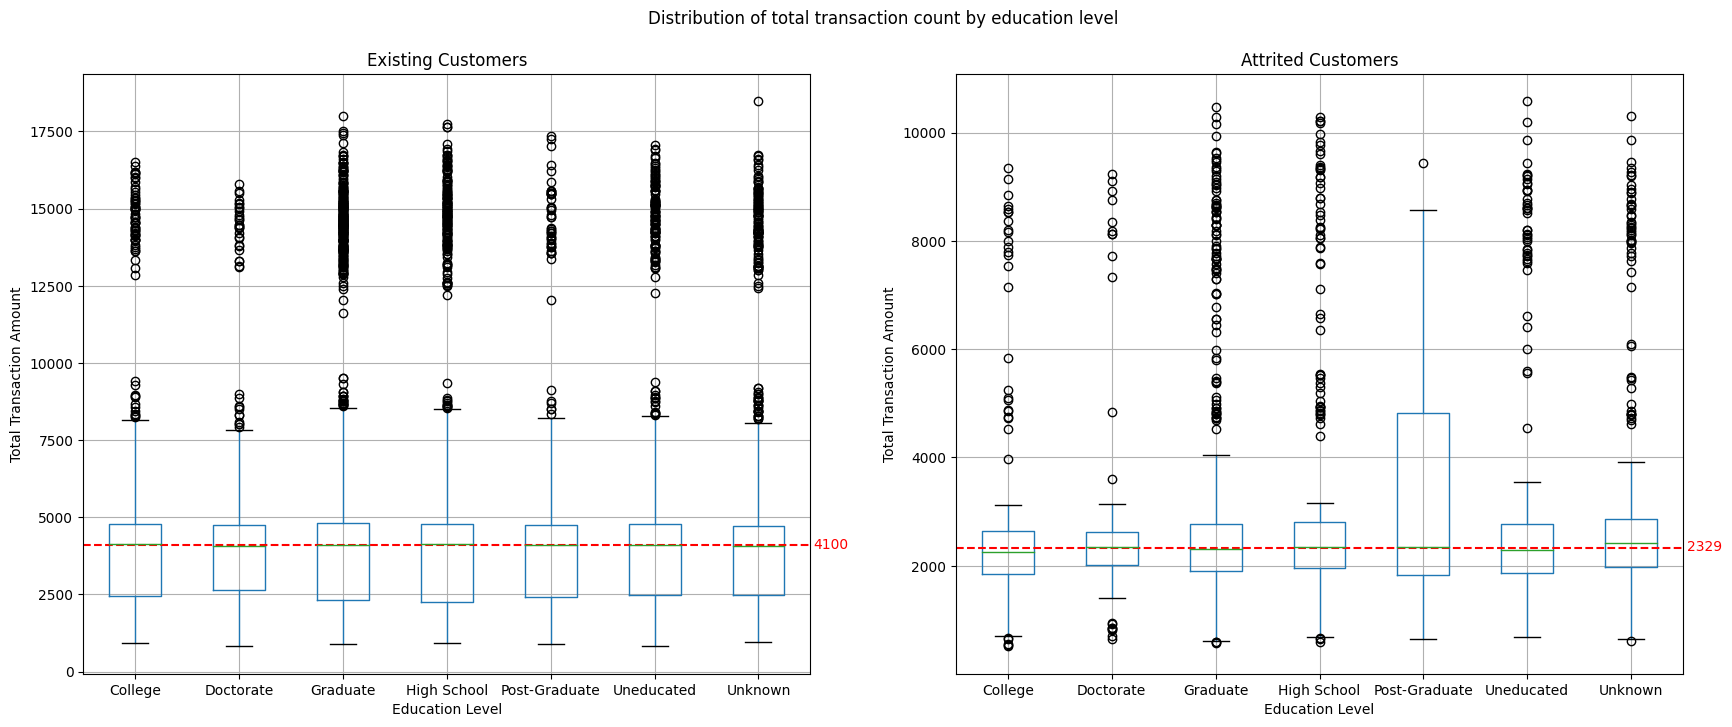

In [580]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

data_existing = existing[['Total_Trans_Amt', 'Education_Level']]
data_attrited = attrited[['Total_Trans_Amt', 'Education_Level']]

#coordinates for auxiliaries line (reference lines)
attrited_median =round(attrited['Total_Trans_Amt'].median()) 
existing_median= round(existing['Total_Trans_Amt'].median())

# plot boxplot for existing customers
data_existing.boxplot(column='Total_Trans_Amt', by='Education_Level', ax=ax1)
ax1.axhline(y=existing_median, color='r', linestyle='--') #reference line
ax1.annotate(existing_median, xy=(0.98, existing_median), xytext=(490, 0), textcoords='offset points', va='center', color='r') #reference line label
ax1.set_title('Existing Customers')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Total Transaction Amount')

# plot boxplot for attrited customers
data_attrited.boxplot(column='Total_Trans_Amt', by='Education_Level', ax=ax2)
ax2.axhline(y=attrited_median, color='r', linestyle='--') #reference line
ax1.annotate(attrited_median, xy=(0.5, attrited_median), xytext=(1155, 38), textcoords='offset points', va='center', color='r') #reference line label
ax2.set_title('Attrited Customers')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Total Transaction Amount')

fig.suptitle('Distribution of total transaction count by education level')

plt.show()

This chart shows the distribution of total transaction amount by education level for both existing and attrited customers using boxplots. The reference lines for the median of total transaction amount for each group are also included.

The left plot shows the distribution for existing customers. We can see that the boxes for each education level are relatively similar in size, indicating that the distribution of total transaction amount is fairly consistent across education levels. However, we can see a lot of outliers for each education level, indicating that some existing customers with each education levels make an unusually high transactions.

The right plot shows the distribution for attrited customers. We can see more variation in the box sizes, but they are still relatively similar in size. Additionally, the overall distribution for attrited customers appears to be lower than for existing customers, with a smaller range of total transaction amounts. However, we can also see outliers for each education level, but they are generally fewer and less extreme than for existing customers (but still a lot of).

The analysis of the boxplots indicates that education level does not seem to have a significant impact on customer attrition. For both existing and attrited customers, we can see that the distribution of total transaction amount is fairly consistent across education levels, with similar box sizes for each level. However, there are a lot of outliers for both groups, indicating that some customers, regardless of their education level, make unusually high transactions.

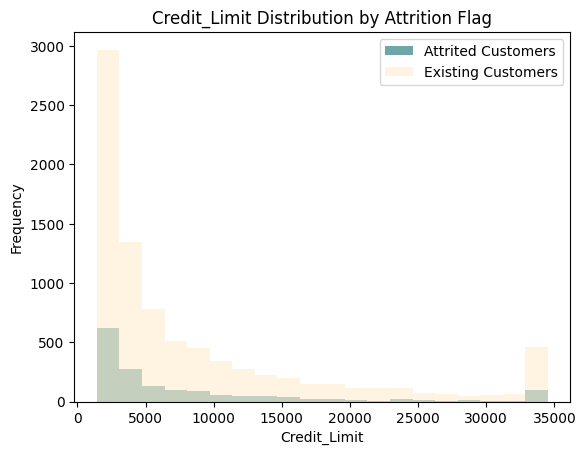

In [581]:
plt.hist(attrited['Credit_Limit'], bins=20, alpha=0.9, color='cadetblue', label='Attrited Customers')
plt.hist(existing['Credit_Limit'], bins=20, alpha=0.6, color='blanchedalmond', label='Existing Customers')

plt.title('Credit_Limit Distribution by Attrition Flag')
plt.xlabel('Credit_Limit')
plt.ylabel('Frequency')

plt.legend(loc='upper right')

plt.show()

Both distributions appear to be relatively similar in shape, with a peak around 3000-4000 for both groups. However, there are some differences between the two distributions. For example, the distribution of credit limits for existing customers appears to have proportionally more observations in the lower range of credit limits compared to attrited customers.

Additionally, we can see that the existing customers have more outliers in the high range of credit limits compared to lost customers. This suggests that, on average, existing customers have higher credit limits than lost customers. However, the extent of this difference is not clear from the histogram alone.

Overall, the chart suggests that credit limit may be a factor in customer attrition, but further analysis is needed to determine the strength and significance of this relationship.

<h1 style='color:cadetblue';>TO BE CONTINUED...</h4>